## 5073 Midterm
#### Spring 2023 
#### Gian Zlupko 

#### 1.  Import the spam dataset and print the first six rows.  

In [9]:
import pandas as pd 
import os

os.chdir('/Users/gianzlupko/Desktop/GR5073 ML/gr5073_ML/data')

# load spam data
spam_data = pd.read_csv("spam_dataset.csv") 

# print first 6 rows 
spam_data.head(6) 


,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,...,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


#### 2.  Read through the documentation of the original dataset here:

http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names

#### The dependent variable is "spam" where one indicates that an email is spam and zero otherwise.  Which three variables in the dataset do you think will be important predictors in a model of spam?  Why?

The three variables that I think will be important predictors of spam are 'word_freq_receive:', 'char_freq_$:', and 'capital_run_length_total'. The first variable, 'word_freq_receive', is a proportion of the total number of words in the email that match the word, 'receive'. Drawing on personal experience, I think the use of the word 'receieve' will be positively related to an email being classified as spam as I have found that many spam emails reach out with the promise to receive some prize (e.g. money, items) in exchange for the information that they are seeking. 

The second variable, 'char_freq_$:', is a proportion of the total number of characters in the body of the email that are '$'. Similar to the first variable, drawing on anecdotal experience, I have observed that many spam emails contain non-alphabetic character symbols. Further, given that the goal of spam emails is generally to entice recipients, I would expect that of all character symbols, the dollar sign would be a commonly used one. Thus, I would expect that its frequency in use would positively relate to the likelihood of an email being spam. 

Finally, the third variable that I've selected is 'capital_run_length_total'. Per the data dictionary, this variable represents the sum of the length of uninterrupted capital letters in an email. Following similar personal intuitions that led me to select the first two variables, I suspect that there may be a relationship between the total amount of capital letters used in an email and its likelihood of being spam. My rationale is that the use of 'all caps', whether for individual words or combinations of words, is a choice that individuals normally use sparingly in day-to-day contexts. For example, in professional contexts, the excessive use of capitals in email language is seen as aggressive and unprofessional. Further, when excessive levels of capital letters are used, it is psychologically very effective at communicating elevated emotions like anger and excitement. For these reasons, the use of sequences of capital letters, like 'all caps', strikes me as a potential manipulative strategy that spam emails may incorporate to solicit an unsuspecting recipient to do some task. Thus, my intuition is that capital run length will be low for non-spam emails and high in spam emails. 

In summary, these are the first three variables that I will train models on to predict whether an email is spam or not.

#### 3.  Visualize the univariate distribution of each of the variables in the previous question. 

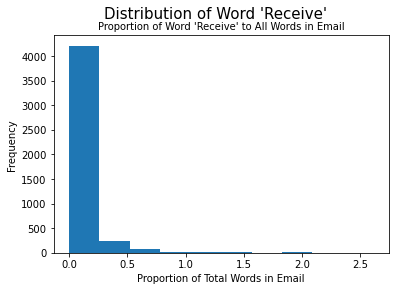

In [25]:
import matplotlib.pyplot as plt 

# visualize first variable: 'word_freq_receive:' 
plt.hist(spam_data['word_freq_receive:']) 
plt.title("Proportion of Word 'Receive' to All Words in Email", fontsize = 10)
plt.suptitle("Distribution of Word 'Receive'", fontsize = 15)
plt.ylabel("Frequency")
plt.xlabel("Proportion of Total Words in Email")
plt.show() 